# Neural translation system

## 1. Cleaning text and saving pairs of words
- download language files from http://www.manythings.org/anki/

In [1]:
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array

In [2]:
def load_doc(filename):
    file = open(filename, mode='rt', encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [3]:
# split the loaded text by line and then by phrase

def to_pairs(doc):
    lines = doc.strip().split('\n')
    pairs = [line.split('\t') for line in lines]
    return pairs

- remove all non-printable characters;
- remove all punctuation characters;
- normalize all Unicode characters to ASCII (e.g. Latin characters);
- normalize the case to lowercase;
- remove any remaining tokens that are not alphabetic.

In [4]:
def clean_pairs(lines):
    cleaned = list()
    # regex for char filtering
    re_print = re.compile('[^%s]' % re.escape(string.printable))
    # translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    
    for pair in lines:
        clean_pair = list()
        for line in pair:
            # normalize unicode chars
            line = normalize('NFD', line).encode('ascii', 'ignore')
            line = line.decode('UTF-8')
            # tokenize on white space
            line = line.split()
            # convert to lowercase
            line = [word.lower() for word in line]
            # remove punctuation for each token
            line = [word.translate(table) for word in line]
            # remove non-printable chars from each token
            line = [re_print.sub('', w) for w in line]
            # remove tokens with numbers in them
            line = [word for word in line if word.isalpha()]
            #store as string
            clean_pair.append(''.join(line))
        cleaned.append(clean_pair)
    return array(cleaned)

In [5]:
# load dataset
filename = 'por-eng/por.txt'
doc = load_doc(filename)

In [6]:
print(doc[:200])

Go.	Vai.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1196331 (alexmarcelo)
Go.	Vá.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #5464111 (ToinhoAlam)
Hi.	Oi.	CC-BY 2.0 


In [7]:
# split into english-portuguese pairs
pairs = to_pairs(doc)

In [8]:
pairs[:5]

[['Go.',
  'Vai.',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1196331 (alexmarcelo)'],
 ['Go.',
  'Vá.',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #5464111 (ToinhoAlam)'],
 ['Hi.',
  'Oi.',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #397074 (brauliobezerra)'],
 ['Run!',
  'Corre!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #1197457 (alexmarcelo)'],
 ['Run!',
  'Corra!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #1197458 (alexmarcelo)']]

In [9]:
# clean sentences
clean_pairs = clean_pairs(pairs)

In [10]:
clean_pairs

array([['go', 'vai', 'ccbyfranceattributiontatoebaorgcmalexmarcelo'],
       ['go', 'va', 'ccbyfranceattributiontatoebaorgcmtoinhoalam'],
       ['hi', 'oi', 'ccbyfranceattributiontatoebaorgcmbrauliobezerra'],
       ...,
       ['achildwhoisanativespeakerusuallyknowsmanythingsabouthisorherlanguagethatanonnativespeakerwhohasbeenstudyingforyearsstilldoesnotknowandperhapswillneverknow',
        'umacriancaqueefalantenativageralmentesabemuitascoisassobresualinguaqueumfalantenaonativoquetemestudadohaanosaindanaosabeetalveznuncasabera',
        'ccbyfranceattributiontatoebaorgckalexmarcelo'],
       ['talesofgentlenessofhonorofjusticeofcourageoffortitudeinsufferingofintrepidityindangerofdauntlessresolutionofironwillinspirechildrentoanemulationofthosevirtues',
        'contosdedocilidadedehonradejusticadecoragemdefortalezaperanteosofrimentodeintrepidezperanteoperigoderesolucaodestemidadevontadedeferroinspiramascriancasaumaemulacaodessasvirtudes',
        'ccbyfranceattributiontatoebaorglwcan

In [11]:
# save a list of clean sentences to file
def save_clean_data(sentences, filename):
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [12]:
# save clean pairs to file
save_clean_data(clean_pairs, 'data/english-portuguese.pkl')

Saved: data/english-portuguese.pkl


In [13]:
# spot check
for i in range(100):
 print('[%s] => [%s]' % (clean_pairs[i,0], clean_pairs[i,1]))

[go] => [vai]
[go] => [va]
[hi] => [oi]
[run] => [corre]
[run] => [corra]
[run] => [corram]
[run] => [corre]
[run] => [corra]
[run] => [corram]
[who] => [quem]
[who] => [que]
[wow] => [uau]
[wow] => [nossa]
[wow] => [wow]
[duck] => [abaixa]
[fire] => [fogo]
[fire] => [incendio]
[fire] => [chama]
[help] => [ajuda]
[help] => [socorro]
[jump] => [pule]
[jump] => [pula]
[jump] => [pulem]
[jump] => [pule]
[jump] => [pulam]
[stop] => [pare]
[stop] => [para]
[stop] => [parem]
[stop] => [parada]
[stop] => [ponto]
[wait] => [espere]
[wait] => [aguarde]
[wait] => [espere]
[wait] => [esperem]
[goon] => [sigaemfrente]
[goon] => [va]
[goon] => [continue]
[goon] => [sigaadiante]
[hello] => [oi]
[hello] => [alo]
[hello] => [ola]
[hello] => [alo]
[hello] => [oi]
[iran] => [eucorri]
[isee] => [eusei]
[isee] => [euentendo]
[isee] => [estouvendo]
[isee] => [euvejo]
[isee] => [euassisto]
[itry] => [eutento]
[itry] => [tento]
[iwon] => [ganhei]
[iwon] => [euvenci]
[iwon] => [euvenci]
[ohno] => [ahnao]
[rel

## 2. Splitting cleaned text into train and test sets

In [14]:
len(clean_pairs)

188739

In [15]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

In [16]:
# load a clean dataset
def load_clean_sentences(filename):
    return load(open(filename, 'rb'))

In [17]:
# save a list of clean sentences to file
def save_clean_data(sentences, filename):
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [18]:
# load dataset
raw_dataset = load_clean_sentences('data/english-portuguese.pkl')

# reduce dataset size to 10000 sentences
n_sentences = 10000
dataset = raw_dataset[:n_sentences, :]

# random shuffle the data
shuffle(dataset)

# split into train/test
train, test = dataset[:9000], dataset[9000:]

In [19]:
# save files
save_clean_data(dataset, 'data/english-portuguese-both.pkl')
save_clean_data(train, 'data/english-portuguese-train.pkl')
save_clean_data(test, 'data/english-portuguese-test.pkl')

Saved: data/english-portuguese-both.pkl
Saved: data/english-portuguese-train.pkl
Saved: data/english-portuguese-test.pkl


## Training a neural translation model

In [20]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint

In [21]:
# function to load the data files
def loead_clean_sentences(filename):
    return load(opne(filename, 'rb'))

In [22]:
# loading full data, train test sets
# dataset is used to define the maximum lenght and vocabulary
dataset = load_clean_sentences('data/english-portuguese-both.pkl')
train = load_clean_sentences('data/english-portuguese-train.pkl')
test = load_clean_sentences('data/english-portuguese-test.pkl')

In [23]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [24]:
# find the lenght of the longest sequence in a list of phrases
def max_length(lines):
    return max(len(line.split()) for line in lines)

In [25]:
# encode and pad sequences prior to embadding
def encode_sequences(tokenizer, length, lines):
    X = tokenizer.texts_to_sequences(lines)
    X = pad_sequences(X, maxlen=length, padding='post')
    return X

In [26]:
# creating english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])

print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))

English Vocabulary Size: 6200
English Max Length: 1


In [27]:
# creating portuguese tokenizer
pt_tokenizer = create_tokenizer(dataset[:, 1])
pt_vocab_size = len(pt_tokenizer.word_index) + 1
pt_length = max_length(dataset[:, 1])

print('Portuguese Vocabulary Size: %d' % pt_vocab_size)
print('Portuguese Max Length: %d' % (pt_length))

Portuguese Vocabulary Size: 8695
Portuguese Max Length: 1


In [28]:
# one hot encode target sequences
def encode_output(sequences, vocab_size):
    ylist = list()
    for sequence in sequences:
        encoded = to_categorical(sequence, num_classes=vocab_size)
        ylist.append(encoded)
    y = array(ylist)
    y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
    return y

In [29]:
# prepare train and validation data
# train
trainX = encode_sequences(pt_tokenizer, pt_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)

# val
testX = encode_sequences(pt_tokenizer, pt_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

In [30]:
trainX[:5]

array([[ 26],
       [ 75],
       [217],
       [959],
       [960]], dtype=int32)

In [31]:
trainY[:5]

array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [32]:
# configuring an LSTM model with Adam optimization

# defining model architecture and parameters
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
    model.add(LSTM(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(LSTM(n_units, return_sequences=True))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [48]:
# creating the model and printing its summary
model = define_model(pt_vocab_size, eng_vocab_size, pt_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1, 256)            2225920   
                                                                 
 lstm_4 (LSTM)               (None, 256)               525312    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 256)           0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 1, 256)            525312    
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 6200)          1593400   
 tributed)                                                       
                                                                 
Total params: 4,869,944
Trainable params: 4,869,944
No

In [49]:
#!conda install pydot
#!conda install graphviz

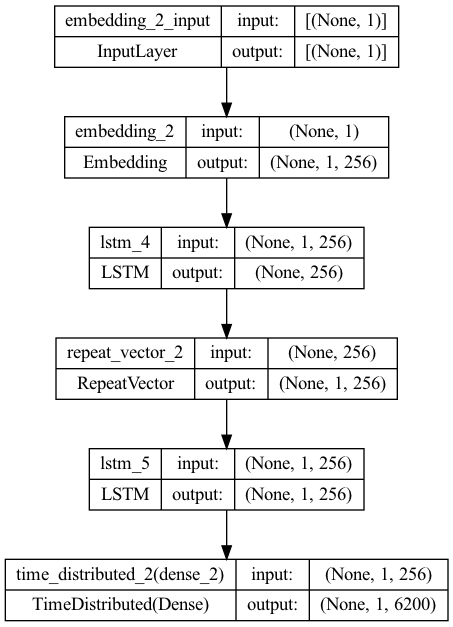

In [50]:
plot_model(model, to_file='model/model.png', show_shapes=True)

In [51]:
# fit the model
filename = 'model/model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(trainX, trainY, epochs=15, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)

Epoch 1/15

Epoch 1: val_loss improved from inf to 8.75793, saving model to model/model.h5
141/141 - 5s - loss: 8.7401 - val_loss: 8.7579 - 5s/epoch - 35ms/step
Epoch 2/15

Epoch 2: val_loss did not improve from 8.75793
141/141 - 3s - loss: 8.6937 - val_loss: 8.7896 - 3s/epoch - 18ms/step
Epoch 3/15

Epoch 3: val_loss did not improve from 8.75793
141/141 - 3s - loss: 8.3093 - val_loss: 9.0162 - 3s/epoch - 18ms/step
Epoch 4/15

Epoch 4: val_loss did not improve from 8.75793
141/141 - 3s - loss: 7.8489 - val_loss: 9.1148 - 3s/epoch - 18ms/step
Epoch 5/15

Epoch 5: val_loss did not improve from 8.75793
141/141 - 3s - loss: 7.4646 - val_loss: 9.2539 - 3s/epoch - 18ms/step
Epoch 6/15

Epoch 6: val_loss did not improve from 8.75793
141/141 - 3s - loss: 7.0599 - val_loss: 9.3488 - 3s/epoch - 18ms/step
Epoch 7/15

Epoch 7: val_loss did not improve from 8.75793
141/141 - 3s - loss: 6.6054 - val_loss: 9.4619 - 3s/epoch - 19ms/step
Epoch 8/15

Epoch 8: val_loss did not improve from 8.75793
141/14

## Evaluating the neural translation model

In [52]:
from pickle import load
from numpy import array
from numpy import argmax
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

In [53]:
# Evaluation involves two steps: 
# 1. generating a translated output sequence,
# 2. repeating this process for many input examples and 
# summarizing the skill of the model across those cases.

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [54]:
# generate target given source sequence
def predict_sequence(model, tokenizer, source):
    prediction = model.predict(source, verbose=0)[0]
    integers = [argmax(vector) for vector in prediction]
    target = list()
    
    for i in integers:
        word = word_for_id(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

In [55]:
model = load_model('model/model.h5')

In [56]:
def evaluate_model(model, tokenizer, sources, raw_dataset):
    actual, predicted = list(), list()
    for i, source in enumerate(sources):
        source = source.reshape((1, source.shape[0]))
        translation = predict_sequence(model, eng_tokenizer, source)
        raw_target, raw_src = raw_dataset[i][0], raw_dataset[i][1]
        if i < 10:
            print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
    actual.append([raw_target.split()])
    predicted.append(translation.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))


In [57]:
# load model
model = load_model('model/model.h5')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX[:20], train[:20])

train
src=[elasseforam], target=[theyvegone], predicted=[itsthere]
src=[tomaplaudiu], target=[tomclapped], predicted=[itsthere]
src=[nosdevemoscomecar], target=[shallwestart], predicted=[pleaselisten]
src=[eunaofuidemitido], target=[iwasntfired], predicted=[itsthere]
src=[quandoeojantar], target=[whensdinner], predicted=[itsthere]
src=[leiaemvozalta], target=[readitaloud], predicted=[itsthere]
src=[eunaoestavaocupado], target=[iwasntbusy], predicted=[itsthere]
src=[medeumbeijo], target=[givemeakiss], predicted=[itsthere]
src=[mandemeumacopia], target=[sendmeacopy], predicted=[itsthere]
src=[otomelouco], target=[tomiscrazy], predicted=[itsthere]
BLEU-1: 0.000000
BLEU-2: 0.000000
BLEU-3: 0.000000
BLEU-4: 0.000000


In [58]:
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX[:20], test[:20])

test
src=[agoraestoumelembrando], target=[nowiremember], predicted=[itsthere]
src=[comadevagar], target=[eatslowly], predicted=[itsthere]
src=[comecem], target=[getstarted], predicted=[itsthere]
src=[fecheessaporta], target=[shutthatdoor], predicted=[itsthere]
src=[acabei], target=[imthrough], predicted=[itsthere]
src=[estounomeucarro], target=[iminmycar], predicted=[itsthere]
src=[nosconseguimos], target=[werehere], predicted=[itsthere]
src=[euseidisso], target=[iknowthis], predicted=[itsthere]
src=[escolhame], target=[chooseme], predicted=[itsthere]
src=[naofumar], target=[dontsmoke], predicted=[itsthere]
BLEU-1: 0.000000
BLEU-2: 0.000000
BLEU-3: 0.000000
BLEU-4: 0.000000
